In [2]:
import numpy as np

def read_ascii_to_array(filename):
    header_lines = 6
    with open(filename, 'r') as f:
        for _ in range(header_lines):
            print(f.readline().strip())

    data = np.loadtxt(filename, skiprows=header_lines)
    return data

filename = "C:/thesis/rusterizer_3d/test.asc"
array = read_ascii_to_array(filename)

print("Array shape:", array.shape)
print(array)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/thesis/rusterizer_3d/test.asc'

In [2]:
from rusterizer_3d import rasterize_from_python

arrays = rasterize_from_python("C:/thesis/rusterizer_3d/example/3dobj.obj", 200, 200, 0.5, [0,0], -9999)


In [ ]:
print(arrays)

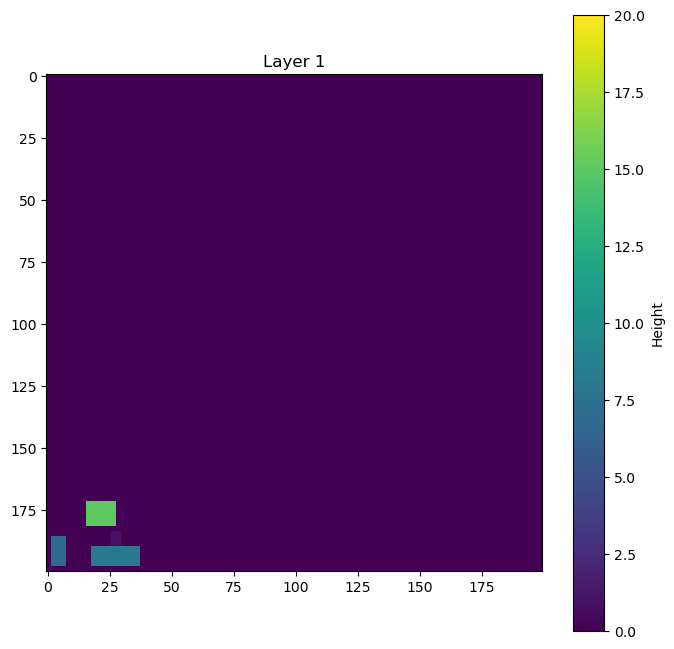

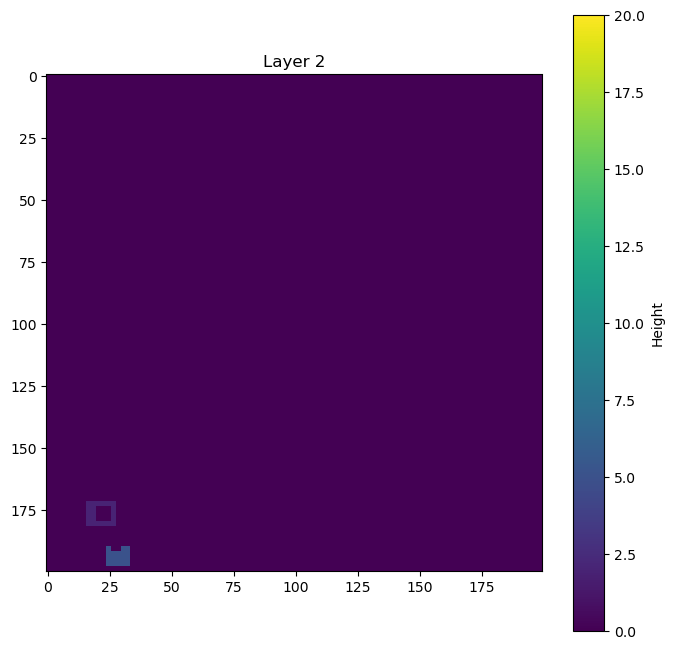

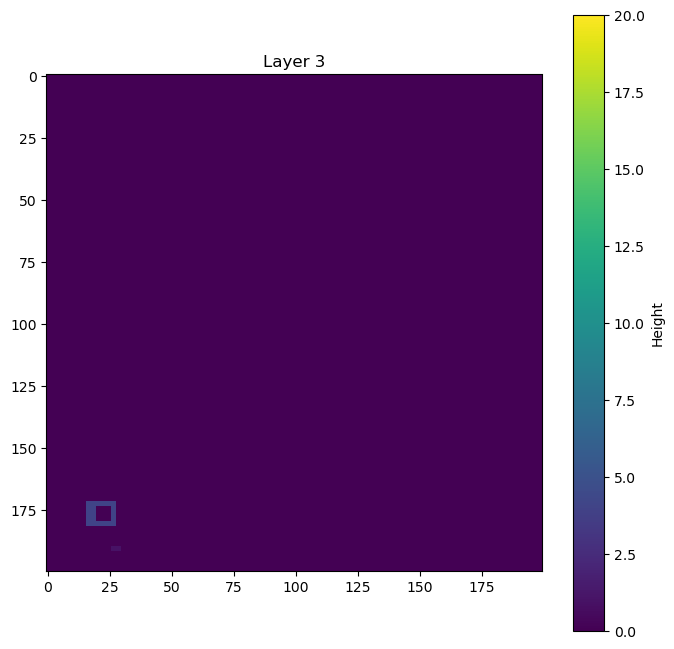

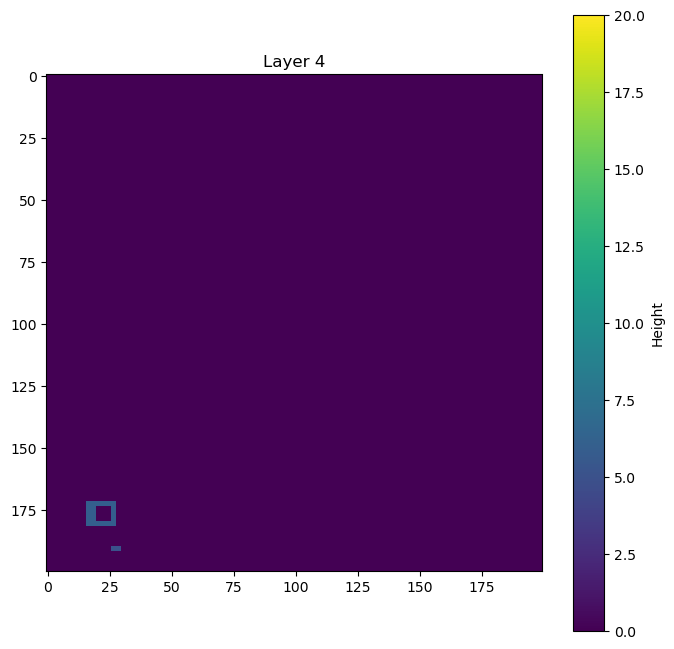

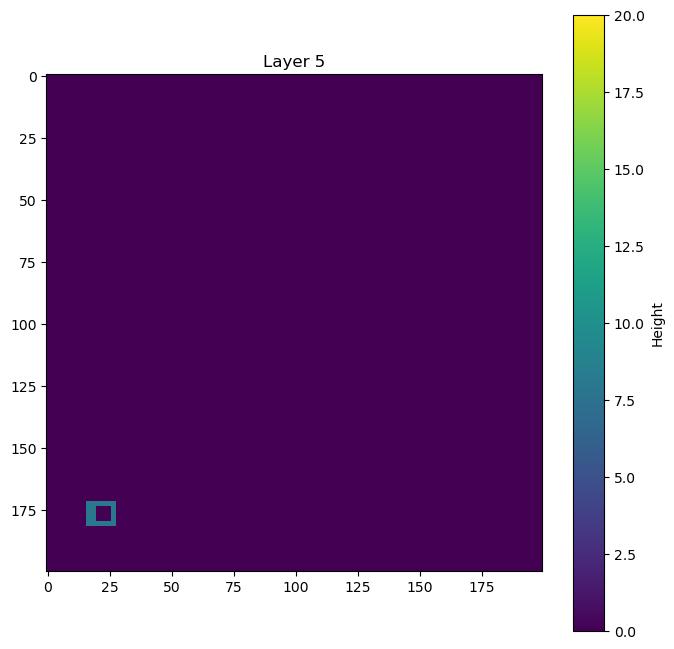

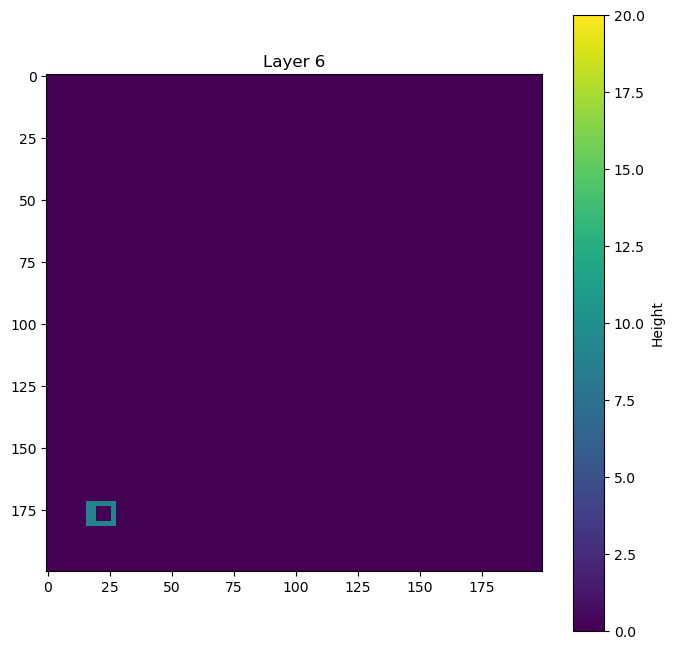

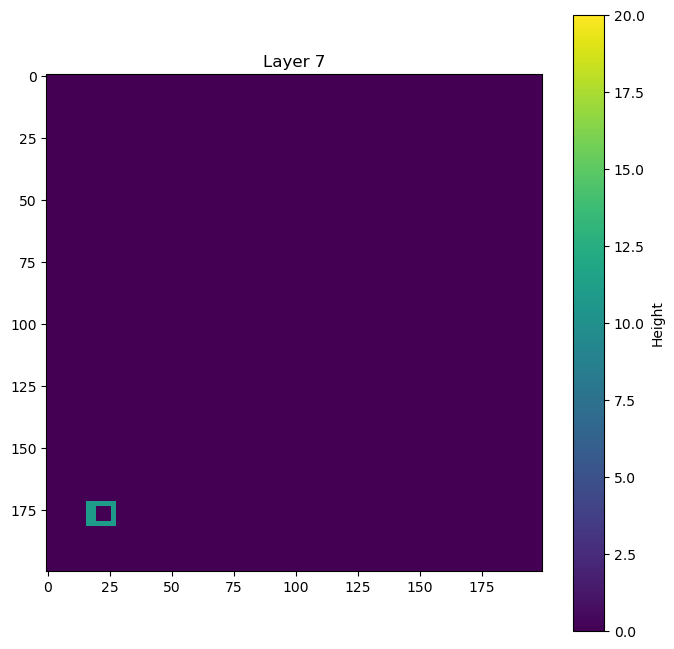

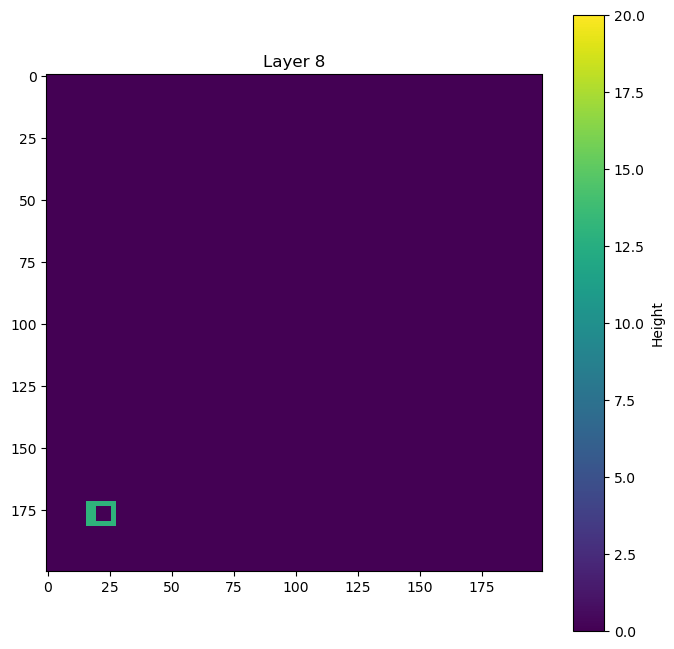

In [4]:
import matplotlib.pyplot as plt
num_layers = arrays.shape[0]

for i in range(num_layers):
    plt.figure(figsize=(8, 8))
    plt.imshow(arrays[i], cmap='viridis', interpolation='none', vmin=0, vmax=20)
    plt.colorbar(label="Height")
    plt.title(f"Layer {i+1}")
    plt.show()



In [5]:
import rasterio
from util.misc import saveraster
from osgeo import gdal


saveraster(gdal_dsm, "output/firstarray.tiff", arrays[0])
saveraster(gdal_dsm, "output/secarray.tiff", arrays[1])
saveraster(gdal_dsm, "output/thirdarray.tiff", arrays[2])

In [10]:
arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
grounded_mask = arrays[1] == 0
gaps = arrays[3] > 0
both_masks = grounded_mask & gaps
dsm0 = np.full(arrays[0].shape, np.nan)
dsm1 = np.full(arrays[0].shape, np.nan)
dsm2 = np.full(arrays[0].shape, np.nan)

dsm0[grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

dsm1[~grounded_mask] = arrays[1][~grounded_mask]
dsm1[both_masks ] = arrays[3][both_masks]

dsm2[~grounded_mask] = arrays[0][~grounded_mask]
dsm2[both_masks ] = arrays[0][both_masks]

In [11]:
saveraster(gdal_dsm, "output/dsm0.tiff", dsm0)
saveraster(gdal_dsm, "output/dsm1.tiff", dsm1)
saveraster(gdal_dsm, "output/dsm2.tiff", dsm2)

In [12]:
saveraster(gdal_dsm, "output/dsm_nogap.tiff", arrays[0])

In [16]:
arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
grounded_mask = arrays[1] == 0
direct_gaps = ~grounded_mask
gaps = arrays[3] > 0
both_masks = grounded_mask & gaps
dsm0 = np.full(arrays[0].shape, np.nan)
dsm1 = np.full(arrays[0].shape, np.nan)
dsm2 = np.full(arrays[0].shape, np.nan)
dsm3 = np.full(arrays[0].shape, np.nan)
dsm4 = np.full(arrays[0].shape, np.nan)

# layer 0
dsm0[grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

# layer 1
dsm1[direct_gaps] = arrays[1][direct_gaps]
dsm1[both_masks] = arrays[3][both_masks]

# layer 2
both_masks_valid = both_masks & ~np.isnan(arrays[4])
both_masks_fallback = both_masks & np.isnan(arrays[4])

dsm2[both_masks_valid] = arrays[4][both_masks_valid]
dsm2[both_masks_fallback] = arrays[0][both_masks_fallback]

direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

dsm2[direct_gaps_valid] = arrays[2][direct_gaps_valid]
dsm2[direct_gaps_fallback] = arrays[0][direct_gaps_fallback]

# layer 3
dsm3[direct_gaps_valid] = arrays[3][direct_gaps_valid]
dsm3[both_masks_valid] = arrays[5][both_masks_valid]

# layer 4

dsm4[direct_gaps_valid] = arrays[0][direct_gaps_valid]
dsm4[both_masks_valid] = arrays[0][both_masks_valid]


saveraster(gdal_dsm, "output/dsm0_gaps2.tiff", dsm0)
saveraster(gdal_dsm, "output/dsm1_gaps2.tiff", dsm1)
saveraster(gdal_dsm, "output/dsm2_gaps2.tiff", dsm2)
saveraster(gdal_dsm, "output/dsm3_gaps2.tiff", dsm3)
saveraster(gdal_dsm, "output/dsm4_gaps2.tiff", dsm4)


In [36]:
arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
grounded_mask = arrays[1] == 0
direct_gaps = ~grounded_mask
gaps = arrays[3] > 0
both_masks = grounded_mask & gaps
dsm0 = np.full(arrays[0].shape, np.nan)
dsm1 = np.full(arrays[0].shape, np.nan)
dsm2 = np.full(arrays[0].shape, np.nan)
dsm3 = np.full(arrays[0].shape, np.nan)
dsm4 = np.full(arrays[0].shape, np.nan)
dsm5 = np.full(arrays[0].shape, np.nan)
dsm6 = np.full(arrays[0].shape, np.nan)

# layer 0
dsm0[grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

# layer 1
dsm1[direct_gaps] = arrays[1][direct_gaps]
dsm1[both_masks] = arrays[3][both_masks]

# layer 2
both_masks_valid = both_masks & ~np.isnan(arrays[4])
both_masks_fallback = both_masks & np.isnan(arrays[4])
#
dsm2[both_masks_valid] = arrays[4][both_masks_valid]
dsm2[both_masks_fallback] = arrays[0][both_masks_fallback]

direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

dsm2[direct_gaps_valid] = arrays[2][direct_gaps_valid]
dsm2[direct_gaps_fallback] = arrays[0][direct_gaps_fallback]

# layer 3
dsm3[direct_gaps_valid] = arrays[3][direct_gaps_valid]
dsm3[both_masks_valid] = arrays[5][both_masks_valid]

# layer 4

both_masks_valid2 = both_masks_valid & ~np.isnan(arrays[6])
both_masks_fallback2 = both_masks_valid & np.isnan(arrays[6])
dsm4[both_masks_valid2] = arrays[6][both_masks_valid2]
dsm4[both_masks_fallback2] = arrays[0][both_masks_fallback2]

direct_gaps_valid2 = direct_gaps_valid & ~np.isnan(arrays[4])
direct_gaps_fallback2 = direct_gaps_valid & np.isnan(arrays[4])

dsm4[direct_gaps_valid2] = arrays[4][direct_gaps_valid2]
dsm4[direct_gaps_fallback2] = arrays[0][direct_gaps_fallback2]

# layer 5
dsm5[direct_gaps_valid2] = arrays[5][direct_gaps_valid2]
dsm5[both_masks_valid2] = arrays[7][both_masks_valid2]

# layer 6

dsm6[direct_gaps_valid2] = arrays[0][direct_gaps_valid2]
dsm6[both_masks_valid2] = arrays[0][both_masks_valid2]


saveraster(gdal_dsm, "output/dsm0_gaps3.tiff", dsm0)
saveraster(gdal_dsm, "output/dsm1_gaps3.tiff", dsm1)
saveraster(gdal_dsm, "output/dsm2_gaps3.tiff", dsm2)
saveraster(gdal_dsm, "output/dsm3_gaps3.tiff", dsm3)
saveraster(gdal_dsm, "output/dsm4_gaps3.tiff", dsm4)
saveraster(gdal_dsm, "output/dsm5_gaps3.tiff", dsm5)
saveraster(gdal_dsm, "output/dsm6_gaps3.tiff", dsm6)

In [42]:
arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
grounded_mask = arrays[1] == 0
direct_gaps = ~grounded_mask
gaps = arrays[3] > 0
both_masks = grounded_mask & gaps
dsm0 = np.full(arrays[0].shape, np.nan)
dsm1 = np.full(arrays[0].shape, np.nan)
dsm2 = np.full(arrays[0].shape, np.nan)
dsm3 = np.full(arrays[0].shape, np.nan)
dsm4 = np.full(arrays[0].shape, np.nan)
dsm5 = np.full(arrays[0].shape, np.nan)
dsm6 = np.full(arrays[0].shape, np.nan)
dsm7 = np.full(arrays[0].shape, np.nan)
dsm8 = np.full(arrays[0].shape, np.nan)

# layer 0
dsm0[grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)

# layer 1
dsm1[direct_gaps] = arrays[1][direct_gaps]
dsm1[both_masks] = arrays[3][both_masks]

# layer 2
both_masks_valid = both_masks & ~np.isnan(arrays[4])
both_masks_fallback = both_masks & np.isnan(arrays[4])
#
dsm2[both_masks_valid] = arrays[4][both_masks_valid]
dsm2[both_masks_fallback] = arrays[0][both_masks_fallback]

direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

dsm2[direct_gaps_valid] = arrays[2][direct_gaps_valid]
dsm2[direct_gaps_fallback] = arrays[0][direct_gaps_fallback]

# layer 3
dsm3[direct_gaps_valid] = arrays[3][direct_gaps_valid]
dsm3[both_masks_valid] = arrays[5][both_masks_valid]

# layer 4

both_masks_valid2 = both_masks_valid & ~np.isnan(arrays[6])
both_masks_fallback2 = both_masks_valid & np.isnan(arrays[6])
dsm4[both_masks_valid2] = arrays[6][both_masks_valid2]
dsm4[both_masks_fallback2] = arrays[0][both_masks_fallback2]

direct_gaps_valid2 = direct_gaps_valid & ~np.isnan(arrays[4])
direct_gaps_fallback2 = direct_gaps_valid & np.isnan(arrays[4])

dsm4[direct_gaps_valid2] = arrays[4][direct_gaps_valid2]
dsm4[direct_gaps_fallback2] = arrays[0][direct_gaps_fallback2]

# layer 5
dsm5[direct_gaps_valid2] = arrays[5][direct_gaps_valid2]
dsm5[both_masks_valid2] = arrays[7][both_masks_valid2]

# layer 6
try:
    both_masks_valid3 = both_masks_valid2 & ~np.isnan(arrays[8])
    both_masks_fallback3 = both_masks_valid2 & np.isnan(arrays[8])
    dsm6[both_masks_valid3] = arrays[8][both_masks_valid3]
    dsm6[both_masks_fallback3] = arrays[0][both_masks_fallback3]
except IndexError:
    print("Outside of list range: arrays does not have an element at index 8")

direct_gaps_valid3 = direct_gaps_valid2 & ~np.isnan(arrays[6])
direct_gaps_fallback3 = direct_gaps_valid2 & np.isnan(arrays[6])

dsm6[direct_gaps_valid3] = arrays[6][direct_gaps_valid3]
dsm6[direct_gaps_fallback3] = arrays[0][direct_gaps_fallback3]

# layer 7
dsm7[direct_gaps_valid3] = arrays[7][direct_gaps_valid3]
if len(arrays) > 8:
    dsm7[both_masks_valid3] = arrays[9][both_masks_valid3]

# layer 8
dsm8[direct_gaps_valid3] = arrays[0][direct_gaps_valid3]
if len(arrays) > 8:
    dsm8[both_masks_valid3] = arrays[0][both_masks_valid3]

saveraster(gdal_dsm, "output/dsm0_gaps4.tiff", dsm0)
saveraster(gdal_dsm, "output/dsm1_gaps4.tiff", dsm1)
saveraster(gdal_dsm, "output/dsm2_gaps4.tiff", dsm2)
saveraster(gdal_dsm, "output/dsm3_gaps4.tiff", dsm3)
saveraster(gdal_dsm, "output/dsm4_gaps4.tiff", dsm4)
saveraster(gdal_dsm, "output/dsm5_gaps4.tiff", dsm5)
saveraster(gdal_dsm, "output/dsm6_gaps4.tiff", dsm6)
saveraster(gdal_dsm, "output/dsm7_gaps4.tiff", dsm7)
saveraster(gdal_dsm, "output/dsm8_gaps4.tiff", dsm8)

Outside of list range: arrays does not have an element at index 8


In [16]:
import numpy as np
gdal_dsm = gdal.Open("D:/Geomatics/thesis/_3drust/testing.tif")
from util.misc import saveraster
from osgeo import gdal

def buildings_input(arrays, num_gaps):
    if num_gaps == 0:
        return arrays[0]

    layers = num_gaps * 2 + 1

    if layers > len(arrays) + 1:
        f"Amount of gaps is too high for the given input. "
        return

    dsms = np.full((layers, arrays[0].shape[0], arrays[0].shape[1]), np.nan)
    arrays = [np.where(arr == -9999, np.nan, arr) for arr in arrays]
    grounded_mask = arrays[1] == 0
    direct_gaps = ~grounded_mask
    gaps = arrays[3] > 0
    both_masks = grounded_mask & gaps

    dsms[0][grounded_mask] =  np.nanmin(np.stack([arrays[0][grounded_mask], arrays[2][grounded_mask]]), axis=0)
    if num_gaps == 1:
        dsms[1][~grounded_mask] = arrays[1][~grounded_mask]
        dsms[1][both_masks ] = arrays[3][both_masks]

        dsms[2][~grounded_mask] = arrays[0][~grounded_mask]
        dsms[2][both_masks ] = arrays[0][both_masks]

    if num_gaps == 2:
        # layer 1
        dsms[1][direct_gaps] = arrays[1][direct_gaps]
        dsms[1][both_masks] = arrays[3][both_masks]
        
        # layer 2
        both_masks_valid = both_masks & ~np.isnan(arrays[4])
        both_masks_fallback = both_masks & np.isnan(arrays[4])
        
        dsms[2][both_masks_valid] = arrays[4][both_masks_valid]
        dsms[2][both_masks_fallback] = arrays[0][both_masks_fallback]
        
        direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
        direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])
        
        dsms[2][direct_gaps_valid] = arrays[2][direct_gaps_valid]
        dsms[2][direct_gaps_fallback] = arrays[0][direct_gaps_fallback]
        
        # layer 3
        dsms[3][direct_gaps_valid] = arrays[3][direct_gaps_valid]
        dsms[3][both_masks_valid] = arrays[5][both_masks_valid]
        
        # layer 4
        dsms[4][direct_gaps_valid] = arrays[0][direct_gaps_valid]
        dsms[4][both_masks_valid] = arrays[0][both_masks_valid]

        return

    if num_gaps == 3:
        # Direct gaps
        dsms[1][direct_gaps] = arrays[1][direct_gaps]
            # layer 2
        direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
        direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])
        
        dsms[2][direct_gaps_valid] = arrays[2][direct_gaps_valid]
        dsms[2][direct_gaps_fallback] = arrays[0][direct_gaps_fallback]
        
        # layer 3
        dsms[3][direct_gaps_valid] = arrays[3][direct_gaps_valid]
        dsms[3][both_masks_valid] = arrays[5][both_masks_valid]
        
        # layer 4
        both_masks_valid2 = both_masks_valid & ~np.isnan(arrays[6])
        both_masks_fallback2 = both_masks_valid & np.isnan(arrays[6])
        dsms[4][both_masks_valid2] = arrays[6][both_masks_valid2]
        dsms[4][both_masks_fallback2] = arrays[0][both_masks_fallback2]
        
        direct_gaps_valid2 = direct_gaps_valid & ~np.isnan(arrays[4])
        direct_gaps_fallback2 = direct_gaps_valid & np.isnan(arrays[4])
        
        dsms[4][direct_gaps_valid2] = arrays[4][direct_gaps_valid2]
        dsms[4][direct_gaps_fallback2] = arrays[0][direct_gaps_fallback2]
        
        # layer 5
        dsms[5][direct_gaps_valid2] = arrays[5][direct_gaps_valid2]
        dsms[5][both_masks_valid2] = arrays[7][both_masks_valid2]
        
        # layer 6
        dsms[6][direct_gaps_valid2] = arrays[0][direct_gaps_valid2]
        dsms[6][both_masks_valid2] = arrays[0][both_masks_valid2]

        return

    if num_gaps == 4:
        # Direct gaps
            # layer 1
        dsms[1][direct_gaps] = arrays[1][direct_gaps]

            # layer 2
        direct_gaps_valid = direct_gaps & ~np.isnan(arrays[2])
        direct_gaps_fallback = direct_gaps & np.isnan(arrays[2])

        dsms[2][direct_gaps_valid] = arrays[2][direct_gaps_valid]
        dsms[2][direct_gaps_fallback] = arrays[0][direct_gaps_fallback]

            # layer 3
        dsms[3][direct_gaps_valid] = arrays[3][direct_gaps_valid]

            # layer 4
        direct_gaps_valid2 = direct_gaps_valid & ~np.isnan(arrays[4])
        direct_gaps_fallback2 = direct_gaps_valid & np.isnan(arrays[4])

        dsms[4][direct_gaps_valid2] = arrays[4][direct_gaps_valid2]
        dsms[4][direct_gaps_fallback2] = arrays[0][direct_gaps_fallback2]

            # layer 5
        dsms[5][direct_gaps_valid2] = arrays[5][direct_gaps_valid2]

             # layer 6
        direct_gaps_valid3 = direct_gaps_valid2 & ~np.isnan(arrays[6])
        direct_gaps_fallback3 = direct_gaps_valid2 & np.isnan(arrays[6])

        dsms[6][direct_gaps_valid3] = arrays[6][direct_gaps_valid3]
        dsms[6][direct_gaps_fallback3] = arrays[0][direct_gaps_fallback3]

             # layer 7
        dsms[7][direct_gaps_valid3] = arrays[7][direct_gaps_valid3]

            # layer 8
        dsms[8][direct_gaps_valid3] = arrays[0][direct_gaps_valid3]

        # not direct gaps
        dsms[1][both_masks] = arrays[3][both_masks]

            # layer 2
        both_masks_valid = both_masks & ~np.isnan(arrays[4])
        both_masks_fallback = both_masks & np.isnan(arrays[4])

        dsms[2][both_masks_valid] = arrays[4][both_masks_valid]
        dsms[2][both_masks_fallback] = arrays[0][both_masks_fallback]

            # layer 3
        dsms[3][both_masks_valid] = arrays[5][both_masks_valid]

            # layer 4
        if len(arrays) > 6:
            both_masks_valid2 = both_masks_valid & ~np.isnan(arrays[6])
            both_masks_fallback2 = both_masks_valid & np.isnan(arrays[6])
            dsms[4][both_masks_valid2] = arrays[6][both_masks_valid2]
            dsms[4][both_masks_fallback2] = arrays[0][both_masks_fallback2]

            # layer 5
            if len(arrays) > 7:
                dsms[5][both_masks_valid2] = arrays[7][both_masks_valid2]

            # layer 6
                if len(arrays) > 8:
                    both_masks_valid3 = both_masks_valid2 & ~np.isnan(arrays[8])
                    both_masks_fallback3 = both_masks_valid2 & np.isnan(arrays[8])
                    dsms[6][both_masks_valid3] = arrays[8][both_masks_valid3]
                    dsms[6][both_masks_fallback3] = arrays[0][both_masks_fallback3]

                    # layer 7
                    if len(arrays) < 9:
                        dsms[7][both_masks_valid3] = arrays[9][both_masks_valid3]

                        # layer 8
                        if len(arrays) > 10:
                            dsms[8][both_masks_valid3] = arrays[0][both_masks_valid3]

    return dsms

In [17]:
num_gaps = 4  # Set number of gaps (layers) to generate

dsm_result = buildings_input(arrays, num_gaps)
print(dsm_result.shape)

# Saving each layer as raster (dsm0 to dsmN)
for i in range(dsm_result.shape[0]):
    saveraster(gdal_dsm, f"output/dsm{i}_gaps{num_gaps}.tiff", dsm_result[i])

(9, 200, 200)


In [7]:
print(arrays)

[[[-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  ...
  [-9.999e+03 -9.999e+03  7.000e+00 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]]

 [[-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  ...
  [-9.999e+03 -9.999e+03  0.000e+00 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]]

 [[-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
  [-9.999e+03 -9.999e+